In [1]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import os

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from src.logger import logger
from src.collector import DataCollector
from enricher import Enricher


In [2]:
df = pd.DataFrame()
logger.info('Inicializar clase Logger')
collector = DataCollector()
enricher = Enricher(logger)

2025-05-24 20:38:57,876 - DataCollector - INFO - Inicializar clase Logger


In [3]:
df_api = collector.download_data()
df_1 = pd.DataFrame(df_api)
#df_1
df_2 = pd.DataFrame(enricher.enrich_data(df_1))
df_2



2025-05-24 20:38:59,903 - DataCollector - INFO - Descargando datos históricos del paladio...
2025-05-24 20:39:01,514 - DataCollector - INFO - Datos descargados correctamente.
2025-05-24 20:39:01,593 - DataCollector - INFO - Datos enriquecidos exitosamente con KPIs


,datetime,open,high,low,close,volume,dividends,stock_splits,volatility,SMA_20,EMA_20,RSI,daily_return,cumulative_return,momentum
0,2024-05-24-00,969.099976,969.099976,969.099976,969.099976,0.0,0.0,0.0,0.0000,0.000,969.1000,0.0000,0.0000,0.0000,0.0
1,2024-05-28-00,976.700012,976.700012,976.700012,976.700012,0.0,0.0,0.0,0.0000,0.000,969.8238,0.0000,0.0078,1.0078,0.0
2,2024-05-29-00,963.099976,963.099976,963.099976,963.099976,4087.0,0.0,0.0,0.0000,0.000,969.1834,0.0000,-0.0139,0.9938,0.0
3,2024-05-30-00,955.000000,957.500000,929.000000,944.299988,394.0,0.0,0.0,0.0000,0.000,966.8136,0.0000,-0.0195,0.9744,0.0
4,2024-05-31-00,942.000000,950.000000,899.200012,899.200012,19.0,0.0,0.0,0.0000,0.000,960.3742,0.0000,-0.0478,0.9279,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2025-05-19-00,979.200012,979.200012,979.200012,979.200012,0.0,0.0,0.0,18.2142,951.465,954.4597,63.7758,0.0234,1.0104,46.7
247,2025-05-20-00,1021.599976,1021.599976,1021.599976,1021.599976,0.0,0.0,0.0,23.2583,956.105,960.8540,71.8034,0.0433,1.0542,91.4
248,2025-05-21-00,1046.599976,1046.599976,1046.599976,1046.599976,0.0,0.0,0.0,30.3798,961.550,969.0203,73.7450,0.0245,1.0800,106.9
249,2025-05-22-00,1024.000000,1024.000000,1024.000000,1024.000000,0.0,0.0,0.0,33.2136,965.355,974.2565,66.0291,-0.0216,1.0567,77.1


In [4]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           251 non-null    object 
 1   open               251 non-null    float64
 2   high               251 non-null    float64
 3   low                251 non-null    float64
 4   close              251 non-null    float64
 5   volume             251 non-null    float64
 6   dividends          251 non-null    float64
 7   stock_splits       251 non-null    float64
 8   volatility         251 non-null    float64
 9   SMA_20             251 non-null    float64
 10  EMA_20             251 non-null    float64
 11  RSI                251 non-null    float64
 12  daily_return       251 non-null    float64
 13  cumulative_return  251 non-null    float64
 14  momentum           251 non-null    float64
dtypes: float64(14), object(1)
memory usage: 29.5+ KB


In [5]:
df_kpi = df_2[["datetime", "volatility"]]
df_kpi.set_index('datetime', inplace=True)
df_kpi.head()

,volatility
datetime,
2024-05-24-00,0.0
2024-05-28-00,0.0
2024-05-29-00,0.0
2024-05-30-00,0.0
2024-05-31-00,0.0


In [6]:
df_kpi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2024-05-24-00 to 2025-05-23-00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   volatility  251 non-null    float64
dtypes: float64(1)
memory usage: 3.9+ KB


# Visualización

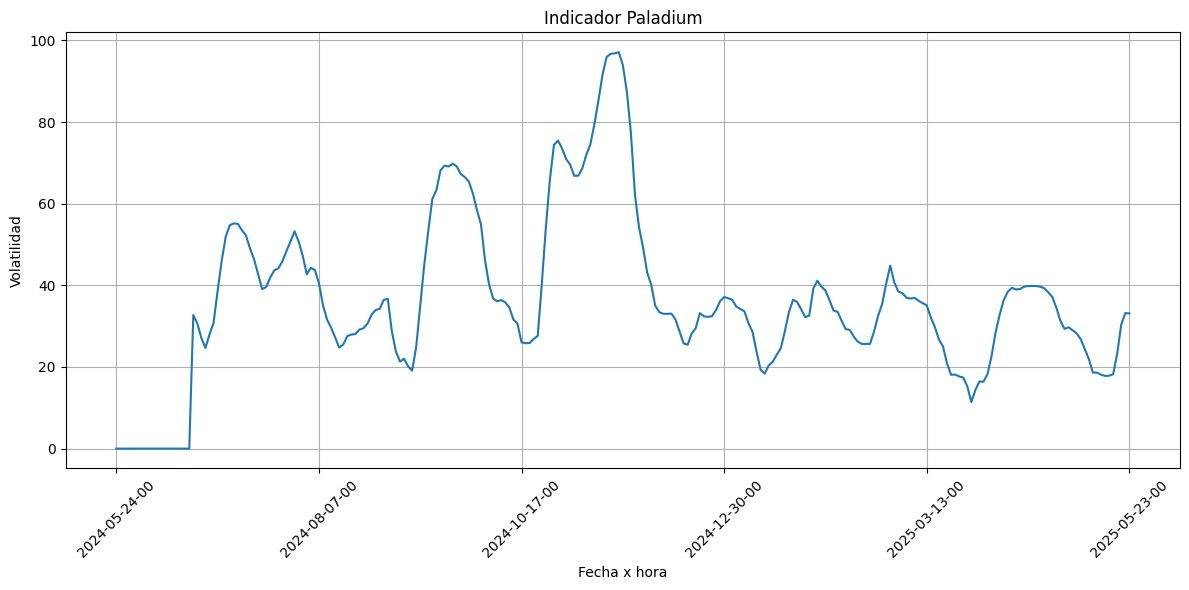

In [7]:
plt.figure(figsize=(12, 6))
df_kpi['volatility'].plot(figsize=(12, 6), label='Volatilidad')
plt.title('Indicador Paladium')
plt.xlabel('Fecha x hora')
plt.ylabel('Volatilidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

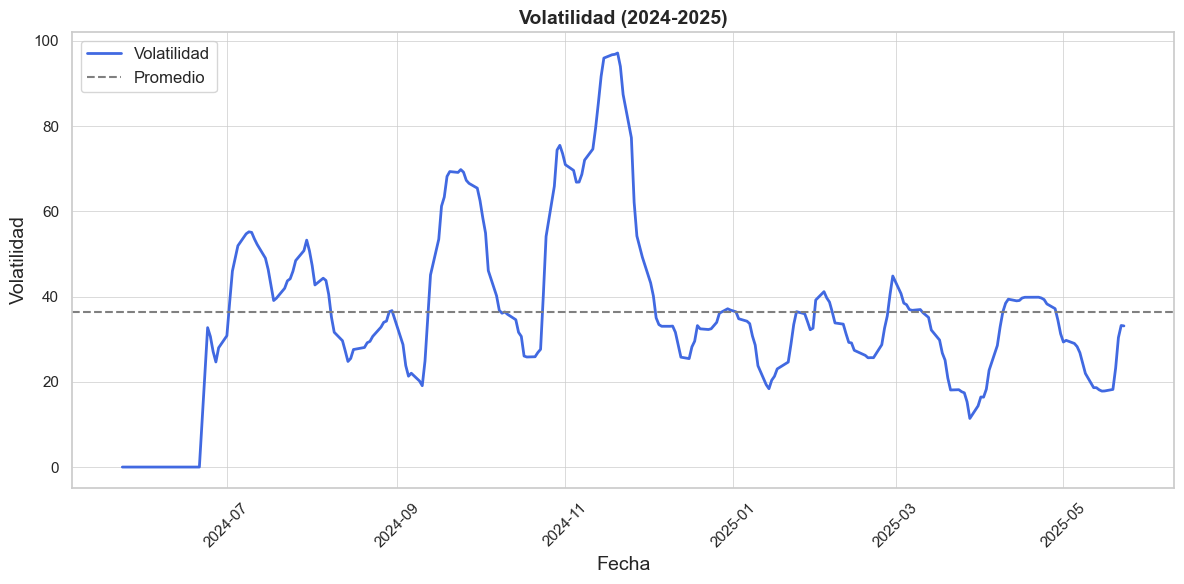

In [8]:
# Visualización con Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
df_kpi.index = pd.to_datetime(df_kpi.index.str.replace('-', ' ', 3), format='%Y %m %d %H')
plt.plot(df_kpi.index, df_kpi['volatility'], color='royalblue', linewidth=2, label='Volatilidad')

plt.title('Volatilidad (2024-2025)', fontsize=14, fontweight='bold')
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Volatilidad', fontsize=14)

plt.axhline(y=df_kpi['volatility'].mean(), color='gray', linestyle='--', label='Promedio')

plt.legend(loc='upper left', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()


# Descomposición estacional
La descomposición estacional separa una serie temporal en tres componentes principales: **tendencia, estacionalidad y residuos**. Esto ayuda a entender mejor los patrones subyacentes y a mejorar los modelos predictivos.

**Tendencia:** Muestra el patrón a largo plazo en los datos.

**Estacionalidad:** Refleja los ciclos periódicos o fluctuaciones regulares.

**Residuos:** Son las variaciones aleatorias o "ruido" no explicadas por la tendencia o estacionalidad.

El método *seasonal_decompose* de *statsmodels* realiza esta descomposición. En nuestro caso, usamos el modelo multiplicativo, lo que significa que la serie es el producto de estos tres componentes.

<Figure size 1200x800 with 0 Axes>

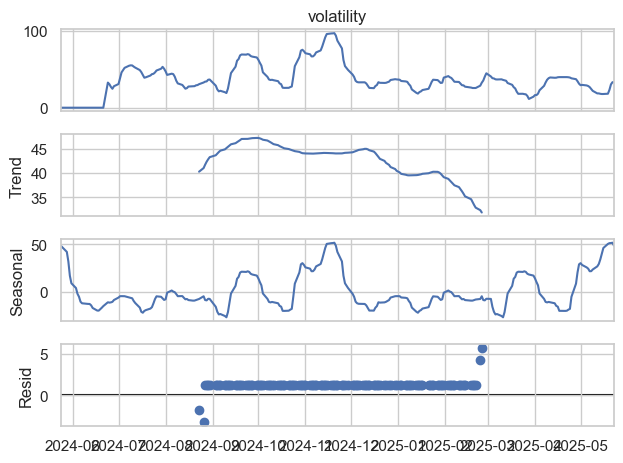

In [9]:
# Descomposición de la serie temporal
decomposition = seasonal_decompose(
    df_kpi['volatility'], 
    model='additive',  # Cambiado a aditivo por los negativos/ceros
    period=125          # Ajustado a 24 horas
)

# Graficar los componentes de la descomposición
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.tight_layout()
plt.show()

# ¿Cómo usar la descomposición para predecir?
**Predicción de la Tendencia:** Una vez identificada la tendencia a largo plazo, puedes proyectar el comportamiento futuro de la serie temporal por ejemplo, crecimiento o disminución.

**Predicción de la Estacionalidad:** Al analizar la componente estacional, puedes prever fluctuaciones regulares como picos durante vacaciones o días festivos. (Anomalias)

**Modelado de Residuos:** Si los residuos muestran patrones no aleatorios, puedes investigar estos patrones y usarlos para mejorar las predicciones. (Filtros)

# Estacionariedad

En una serie temporal, la estacionariedad significa que las propiedades estadísticas como la media, varianza y autocorrelación no cambian con el tiempo. Las series estacionarias son más fáciles de modelar y predecir.

**Test de Estacionariedad: Dickey-Fuller Aumentado (ADF)**

Este test nos ayuda a saber si una serie temporal es estacionaria (es decir, si su comportamiento no cambia mucho a lo largo del tiempo).

**¿Cómo interpretarlo?**

- Si el **p-valor > 0.05** la serie **NO es estacionaria**.
- Si el **p-valor ≤ 0.05** la serie **SÍ es estacionaria**.


In [11]:
result = adfuller(df_kpi['volatility'])

print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f' {key}: {value}')

if result[1] > 0.05:
    print("\nLa serie NO es estacionaria (p-valor > 0.05)")
else:
    print("\nLa serie es estacionaria (p-valor <= 0.05)")

ADF Statistic: -3.591586608045795
p-value: 0.005923925892523947
Critical Values:
 1%: -3.4569962781990573
 5%: -2.8732659015936024
 10%: -2.573018897632674

La serie es estacionaria (p-valor <= 0.05)


In [12]:
# Serie diferenciada
df_diff = df_kpi['volatility'].diff().dropna()
df_diff


datetime
2024-05-28    0.0000
2024-05-29    0.0000
2024-05-30    0.0000
2024-05-31    0.0000
2024-06-03    0.0000
               ...  
2025-05-19    0.3626
2025-05-20    5.0441
2025-05-21    7.1215
2025-05-22    2.8338
2025-05-23   -0.0970
Name: volatility, Length: 250, dtype: float64

In [13]:
# Con la serie diferenciada
result_diff = adfuller(df_diff)
print("ADF Statistic:", result_diff[0])
print("p-value:", result_diff[1])
print("Critical Values:")
for key, value in result_diff[4].items():
    print(f' {key}: {value}')

if result_diff[1] > 0.05:
    print("\nLa serie diferenciada NO es estacionaria")
else:
    print("\nLa serie diferenciada es estacionaria")

ADF Statistic: -8.528944081514332
p-value: 1.0504246894794088e-13
Critical Values:
 1%: -3.4568881317725864
 5%: -2.8732185133016057
 10%: -2.5729936189738876

La serie diferenciada es estacionaria


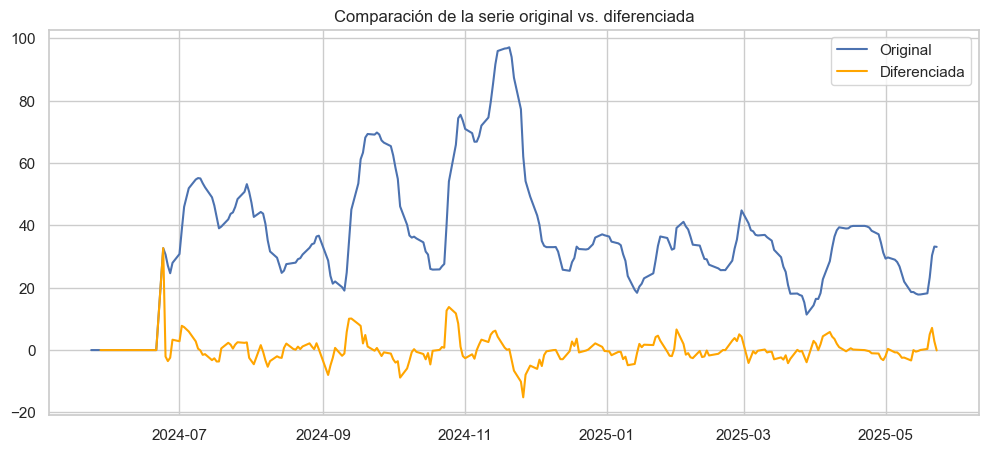

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(df_kpi['volatility'], label='Original')
plt.plot(df_diff, label='Diferenciada', color='orange')
plt.title('Comparación de la serie original vs. diferenciada')
plt.legend()
plt.grid(True)
plt.show()

Si la serie diferenciada aún no es estacionaria, podemos aplicar una segunda diferenciación o transformaciones como logaritmicas. También podemos usar modelos más flexibles que no requieren estrictamente estacionariedad. Lo importante es asegurarnos de que el modelo que elijamos se adapte al comportamiento de la serie.

In [17]:
df_diff2 = df_diff.diff().dropna()
df_diff2.head()

datetime
2024-05-29    0.0
2024-05-30    0.0
2024-05-31    0.0
2024-06-03    0.0
2024-06-04    0.0
Name: volatility, dtype: float64

In [18]:
result_diff2 = adfuller(df_diff2)
print("ADF Statistic (segunda diferencia):", result_diff2[0])
print("p-value:", result_diff2[1])

if result_diff2[1] > 0.05:
    print("\nLa serie aún NO es estacionaria")
else:
    print("\nLa serie es estacionaria con segunda diferenciación")


ADF Statistic (segunda diferencia): -9.65212276128522
p-value: 1.4255184311387914e-16

La serie es estacionaria con segunda diferenciación


**Primera diff:** elimina tendencia lineal.

**Segunda diff:** elimina tendencia cuadrática o comportamientos más complejos.




Una vez evaluada la estacionariedad, es fundamental analizar cómo los valores pasados de la serie se relacionan entre sí. Para esto se utilizan dos herramientas estadísticas clave:

# **Función de Autocorrelación (ACF)**
La ACF mide la correlación entre los valores actuales de la serie y sus valores pasados (rezagos). Nos ayuda a detectar patrones repetitivos o dependencias temporales. Es especialmente útil para identificar el orden del componente de media móvil (MA) en un modelo ARIMA.

# **Función de Autocorrelación Parcial (PACF)**
La PACF mide la correlación entre un valor y su rezago, eliminando la influencia de los rezagos intermedios. Es útil para identificar el orden del componente autorregresivo (AR) en modelos ARIMA.

Ambas funciones nos permiten visualizar la estructura de dependencia temporal en la serie y guiar la selección de los parámetros adecuados para los modelos predictivos.

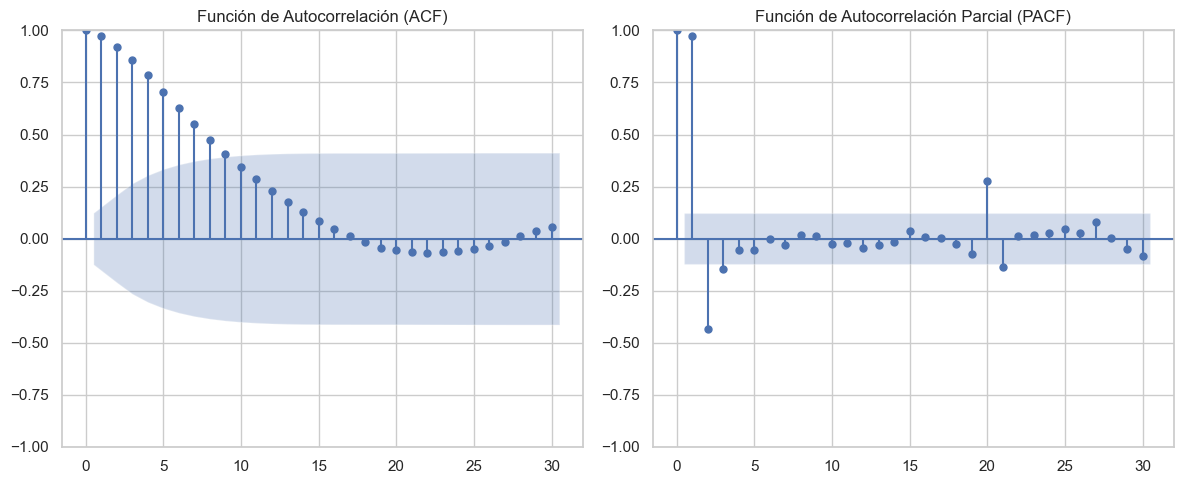

In [19]:
serie = df_kpi['volatility']
plt.figure(figsize=(12,5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(serie, lags=30, ax=plt.gca())
plt.title('Función de Autocorrelación (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(serie, lags=30, ax=plt.gca(), method='ywm')  # ywm = Yule-Walker-MLE
plt.title('Función de Autocorrelación Parcial (PACF)')

plt.tight_layout()
plt.show()


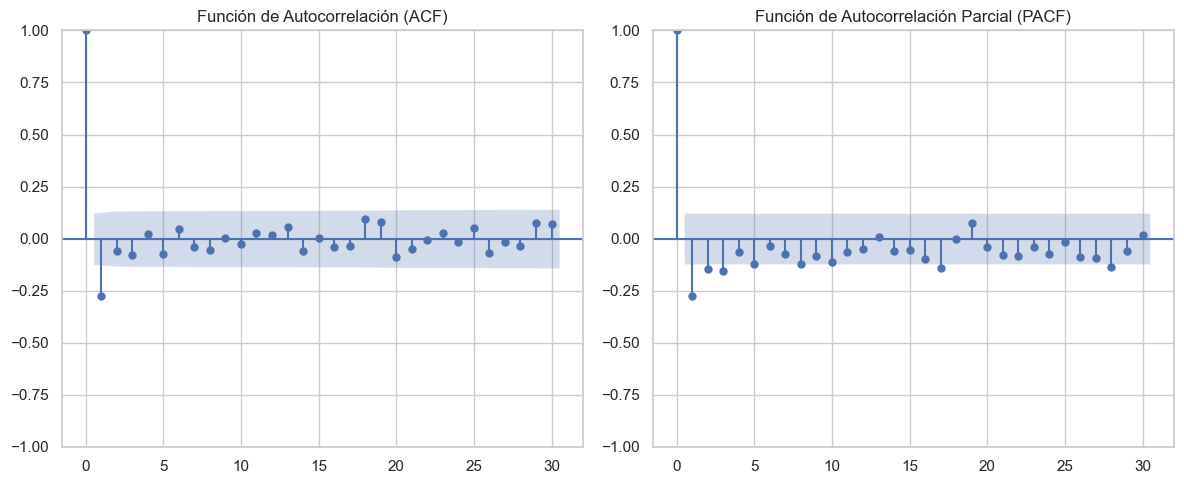

In [21]:
serie = df_kpi['volatility']

plt.figure(figsize=(12,5))

# ACF
plt.subplot(1, 2, 1)
plot_acf(df_diff2, lags=30, ax=plt.gca())
plt.title('Función de Autocorrelación (ACF)')

# PACF
plt.subplot(1, 2, 2)
plot_pacf(df_diff2, lags=30, ax=plt.gca(), method='ywm')
plt.title('Función de Autocorrelación Parcial (PACF)')

plt.tight_layout()

### Estacionariedad y transformación de la serie

En las gráficas ACF y PACF iniciales, observamos una clara señal de **no estacionariedad**, ya que las autocorrelaciones decrecen lentamente y muchas están fuera del intervalo de confianza. Esto indica la presencia de una **tendencia persistente**.

Tras aplicar una **segunda diferenciación**, las nuevas gráficas muestran un comportamiento mucho más estable: la mayoría de los valores de ACF y PACF se encuentran dentro del intervalo de confianza, lo cual sugiere que la serie **ha alcanzado la estacionariedad**.

Este análisis se alinea con los resultados del test ADF, que también confirma estacionariedad tras la segunda diferencia. Con esta transformación, la serie está lista para ser modelada.


#**Tipos de modelos**

**Promedio móvil**
El modelo de promedio móvil simple suaviza una serie temporal al calcular el promedio de una ventana de observaciones consecutivas.
Es útil para eliminar fluctuaciones de corto plazo y resaltar tendencias de largo plazo.

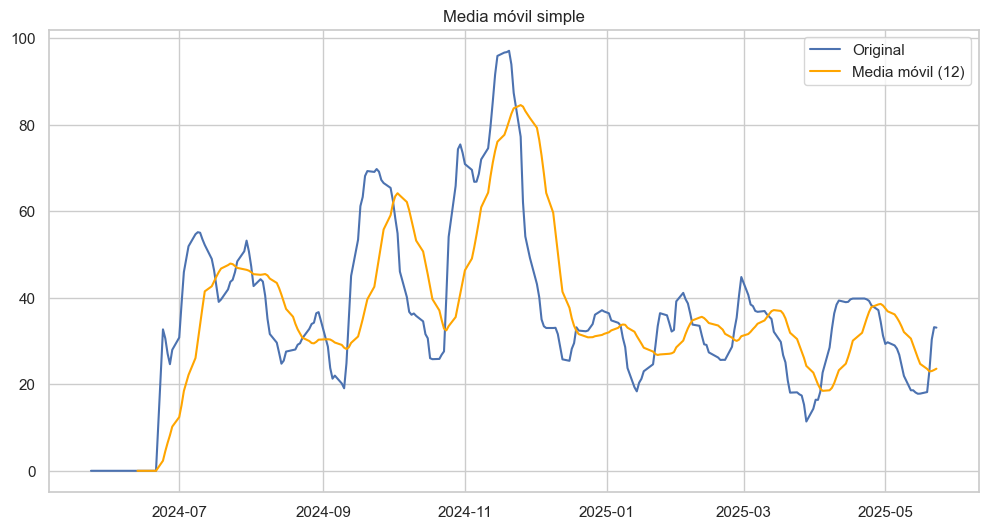

In [22]:
# Suavizado con media móvil simple (ej: ventana de 12 períodos)
df['MA_12'] = df_kpi['volatility'].rolling(window=14).mean()

plt.figure(figsize=(12,6))
plt.plot(df_kpi['volatility'], label='Original')
plt.plot(df['MA_12'], label='Media móvil (12)', color='orange')
plt.title('Media móvil simple')
plt.legend()
plt.show()


El **suavizado exponencial** simple asigna más peso a observaciones recientes usando un coeficiente de suavizado α.
El modelo es adecuado para series sin tendencia ni estacionalidad.

C:\Users\Gedar\Documents\IUDigital_ING_SOFT\semestre_03_25\proyecto_integrado_V\integrative_project_v\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


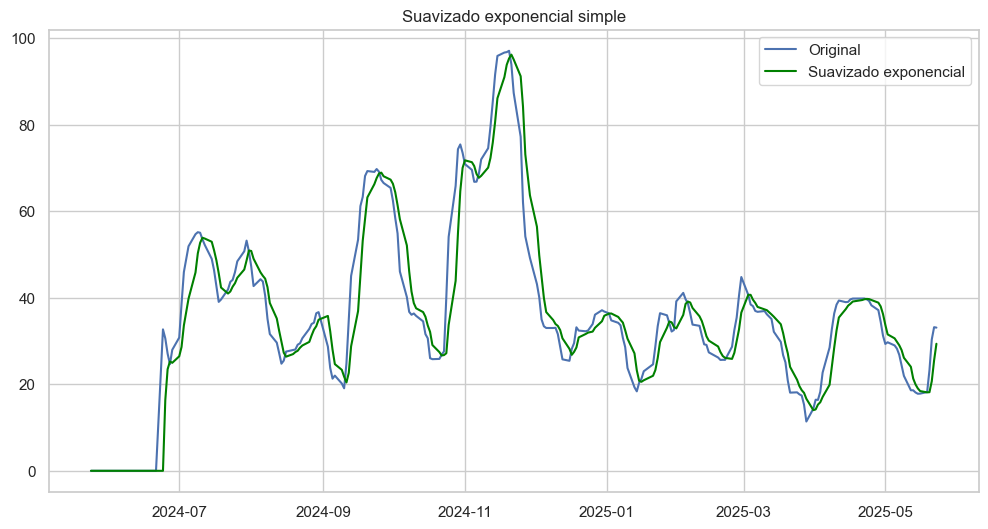

In [23]:
model_ses = SimpleExpSmoothing(df_kpi['volatility']).fit(smoothing_level=0.5, optimized=False)
df['SES'] = model_ses.fittedvalues

plt.figure(figsize=(12,6))
plt.plot(df_kpi['volatility'], label='Original')
plt.plot(df['SES'], label='Suavizado exponencial', color='green')
plt.title('Suavizado exponencial simple')
plt.legend()
plt.show()


In [6]:
import pickle

with open("palladium/static/models/palladium_model.pkl", "rb") as f:
    data = pickle.load(f)

# Ver el tipo de objeto
print(type(data))

# Inspeccionar el contenido
print(data)
# Inspeccionar una parte del contenido
for k in data:
    print(f"Clave: {k}, Tipo: {type(data[k])}")

<class 'dict'>
{'model': RandomForestRegressor(max_depth=10, random_state=42), 'scaler': StandardScaler()}
Clave: model, Tipo: <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Clave: scaler, Tipo: <class 'sklearn.preprocessing._data.StandardScaler'>


C:\Users\Gedar\Documents\IUDigital_ING_SOFT\semestre_03_25\proyecto_integrado_V\integrative_project_v\src
